# Titanic Survival Prediction

## Importing 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing DataSet

In [2]:
df_train = pd.read_csv(r'C:\Users\Vijay Krishna\Desktop\ML\Kaggle\Classification\Titanic\train.csv')
df_test = pd.read_csv(r'C:\Users\Vijay Krishna\Desktop\ML\Kaggle\Classification\Titanic\test.csv')

## Exploratory Data Analysis

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


###### Consists of Basic Information of Passengers and their status of Survival - `Survived-1` ,` Dead-0`

In [4]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


###### Need to predict the Survival

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Inference: 
There are null values in Age and Cabin, they are dealt in `Feautre Engineering Section`.

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Visualizations
###### Let us look into the number of Survivors w.r.t Sex

In [7]:
# Total number of Males/Females
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

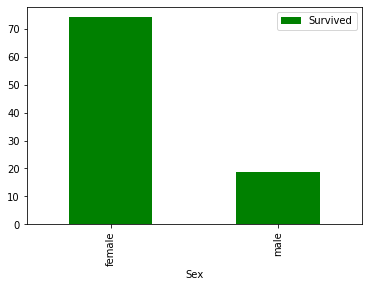

In [8]:
(df_train.groupby(['Sex']).agg({'Survived':'mean'})*100).plot(kind='bar',color='Green')
plt.show()

##### Inference: 
The Survival of Male is Significantly low with just 18 % as Compared to that of Female 72%.
<br>[From the fact we know Children and women are given atmost priority]

#### Let us look at the Average Survival Based on the Socio-Economic Class 

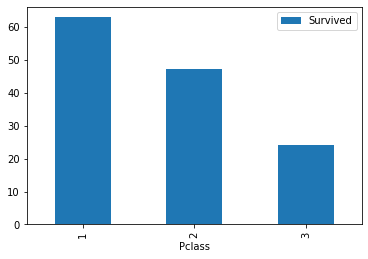

In [9]:
(df_train.groupby(['Pclass']).agg({'Survived':'mean'})*100).plot(kind='bar')
plt.show()

##### Inference: 
Results are quite Expected as the Upper Class is has Highest Survival % above 65%.


#### Let us Create Age Group to understand the survival wrt age group

In [10]:
df_temp = df_train
df_temp['AgeGrp'] = df_temp.Age.apply(lambda x: x//10)

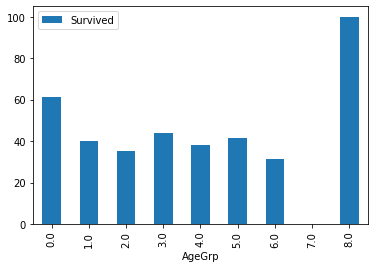

In [11]:
(df_temp.groupby(['AgeGrp']).agg({'Survived':'mean'})*100).plot(kind='bar')
plt.show()

##### Inference: 
It is evident that AgeGrp has an anamoly in data anlysis omitting it the next highest chance of survival is 0-10 years followed by 20-30 years

#### Let us understand the Survival wrt   Age Group and Sex

In [12]:
df_temp= df_temp[df_temp.AgeGrp<7]

In [13]:
h=df_temp.pivot_table(index=['Sex'],columns=['AgeGrp'],values ='Survived',aggfunc=np.mean)


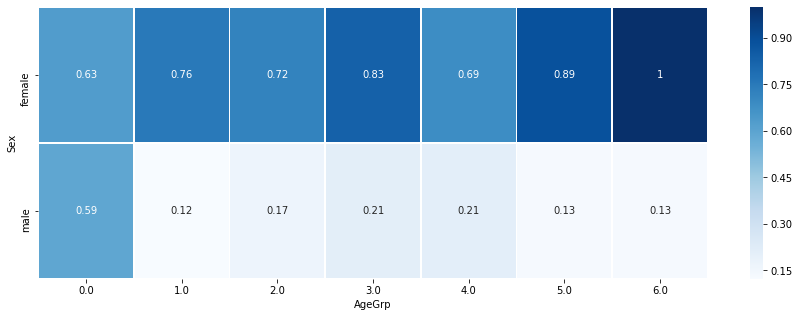

In [14]:
plt.figure(figsize=[15,5])
sns.heatmap(h, cmap='Blues',annot=True,linewidth=0.5)
b, t = plt.ylim() # the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 
plt.show()

###### Inference: 
It can be inferred that Females in Age Grps 6,5,3 have higher mean Survival 

#### Let us understand the Survival w.r.t Age Group, Sex and Pclass

In [15]:
df_temp.pivot_table(index=['AgeGrp','Pclass'],columns=['Sex'],values ='Survived',aggfunc=np.mean)


Sex              female      male
AgeGrp Pclass                    
0.0    1       0.000000  1.000000
       2       1.000000  1.000000
       3       0.523810  0.380952
1.0    1       1.000000  0.400000
       2       1.000000  0.100000
       3       0.541667  0.095238
2.0    1       0.937500  0.500000
       2       0.880000  0.000000
       3       0.483871  0.156863
3.0    1       1.000000  0.521739
       2       0.941176  0.096774
       3       0.437500  0.150943
4.0    1       1.000000  0.375000
       2       0.900000  0.125000
       3       0.000000  0.080000
5.0    1       0.916667  0.266667
       2       0.833333  0.000000
       3            NaN  0.000000
6.0    1       1.000000  0.100000
       2            NaN  0.333333
       3       1.000000  0.000000

#### Let us  look at the distribution plots


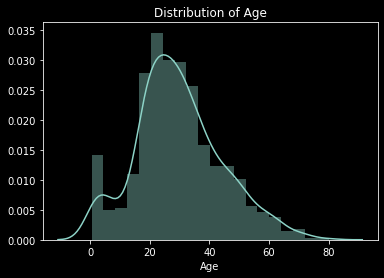

In [16]:
plt.style.use('dark_background')
sns.distplot(df_train[~(df_train.Age.isnull())]['Age'])
plt.title('Distribution of Age',fontsize=12)
plt.show()

###### Inference: 
Right Tailed Distribution that means outliers are present beyond upper fence

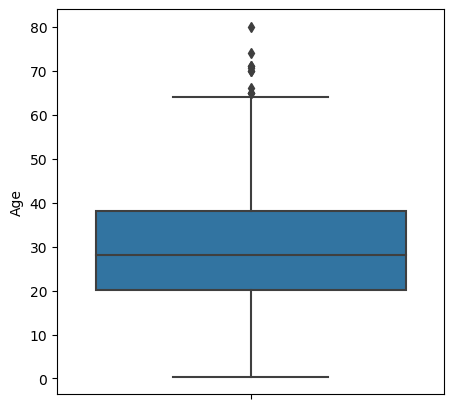

In [17]:
plt.style.use('default')
plt.figure(figsize=[5,5])
sns.boxplot(df_train[~(df_train.Age.isnull())]['Age'],orient='v')
plt.show()

Before Removing the Outliers let us also look at the Boxplot for df_test

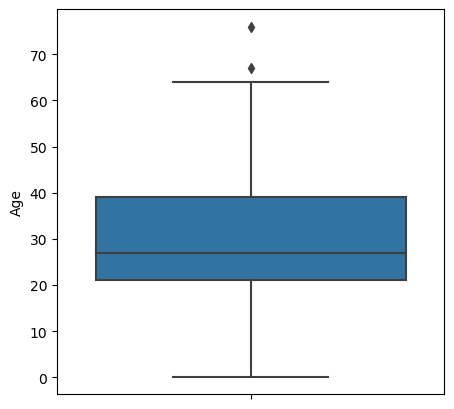

In [18]:
plt.figure(figsize=[5,5])
sns.boxplot(df_test[~(df_test.Age.isnull())]['Age'],orient='v')
plt.show()

###### Inference: 
By comparing both the box plots it would be sensible remove the outliers in age >80 (atleast for prediction)

In [19]:
#df_train[df_train.Age<80]

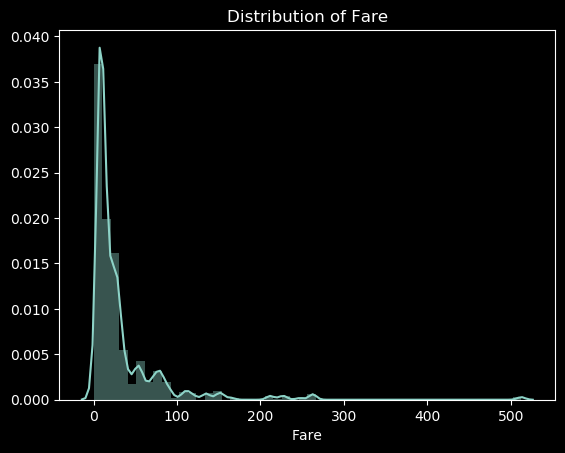

In [20]:
plt.style.use('dark_background')
sns.distplot(df_train[~(df_train.Fare.isnull())]['Fare'])
plt.title('Distribution of Fare',fontsize=12)
plt.show()

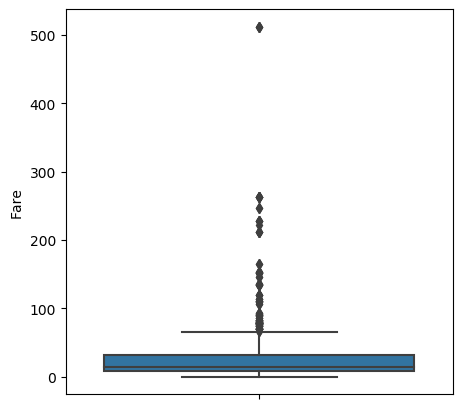

In [21]:
plt.style.use('default')
plt.figure(figsize=[5,5])
sns.boxplot(df_train[~(df_train.Fare.isnull())]['Fare'],orient='v')
plt.show()

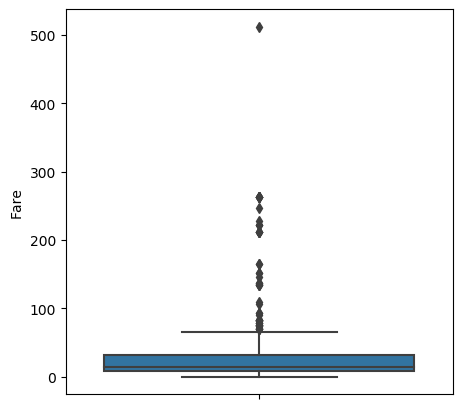

In [22]:
plt.figure(figsize=[5,5])
sns.boxplot(df_test[~(df_test.Fare.isnull())]['Fare'],orient='v')
plt.show()

###### Inference: 
By comparing both the box plots it would be better to leave the outliers which would help prediction

## Feature Engineering

`Name` Column can be used by extracting the Titles

In [23]:
def get_titles(data):
    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    return data

df_train=get_titles(df_train)
df_test =get_titles(df_test) 

In [24]:
title_dict = {
    "Capt": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Jonkheer": "Rare",
    "Don": "Rare",
    "Dona": "Miss",
    "Sir" : "Rare",
    "Dr": "Rare",
    "Rev": "Rare",
    "the Countess":"Rare",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Rare"
}
# map each title to its class or category
df_train.Title = df_train.Title.map(title_dict)
df_test.Title = df_test.Title.map(title_dict)


In [25]:
del df_train['AgeGrp']


`Cabin` Column can be used by extracting the `Deck` for 1st class Passengers and rest are Unkown 
 Lets us first NaN cabins as 'U' 

In [26]:
def getdeck(df):
    df.Cabin.fillna('U',inplace=True)
    df['Deck'] = df.Cabin.apply(lambda x:x[0])

In [27]:
getdeck(df_train)
getdeck(df_test)

Now We can drop Columns `Pasengerid` `Ticket` `Cabin` `Name`

In [28]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_test=df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
Deck        891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
Title       418 non-null object
Deck        418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


### Dealing with the Missing Values `Age Embarked`,`Age Fare`

Let us fill the Embarked with Mode as it is Categorical 

In [31]:
df_train.Embarked = df_train.Embarked.fillna(df_train.Embarked.mode()[0]) 

But for `Age` let us make use of Medians of the `Title` 

In [32]:
def fillage(df):
    for title in df['Title'].unique():   
        df.loc[df['Title']==title,'Age']= df.loc[df['Title']==title,'Age'].fillna(df.loc[df["Title"]==title]['Age'].median())


In [33]:
fillage(df_train)
fillage(df_test)

In [34]:
df_test.Fare = df_test.Fare.fillna(df_test.Fare.median()) 

In [35]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,male,22.0,1,0,7.2500,S,Mr,U
1,1,1,female,38.0,1,0,71.2833,C,Mrs,C
2,1,3,female,26.0,0,0,7.9250,S,Miss,U
3,1,1,female,35.0,1,0,53.1000,S,Mrs,C
4,0,3,male,35.0,0,0,8.0500,S,Mr,U
5,0,3,male,30.0,0,0,8.4583,Q,Mr,U
6,0,1,male,54.0,0,0,51.8625,S,Mr,E
7,0,3,male,2.0,3,1,21.0750,S,Master,U
8,1,3,female,27.0,0,2,11.1333,S,Mrs,U
9,1,2,female,14.0,1,0,30.0708,C,Mrs,U


In [36]:
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,male,34.5,0,0,7.8292,Q,Mr,U
1,3,female,47.0,1,0,7.0000,S,Mrs,U
2,2,male,62.0,0,0,9.6875,Q,Mr,U
3,3,male,27.0,0,0,8.6625,S,Mr,U
4,3,female,22.0,1,1,12.2875,S,Mrs,U
5,3,male,14.0,0,0,9.2250,S,Mr,U
6,3,female,30.0,0,0,7.6292,Q,Miss,U
7,2,male,26.0,1,1,29.0000,S,Mr,U
8,3,female,18.0,0,0,7.2292,C,Mrs,U
9,3,male,21.0,2,0,24.1500,S,Mr,U


### Model Preperation

In [37]:
X_train = df_train.drop(['Survived'],axis=1)
print(X_train)

print(X_train.shape)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title Deck
0         3    male  22.0      1      0   7.2500        S    Mr    U
1         1  female  38.0      1      0  71.2833        C   Mrs    C
2         3  female  26.0      0      0   7.9250        S  Miss    U
3         1  female  35.0      1      0  53.1000        S   Mrs    C
4         3    male  35.0      0      0   8.0500        S    Mr    U
..      ...     ...   ...    ...    ...      ...      ...   ...  ...
886       2    male  27.0      0      0  13.0000        S  Rare    U
887       1  female  19.0      0      0  30.0000        S  Miss    B
888       3  female  21.0      1      2  23.4500        S  Miss    U
889       1    male  26.0      0      0  30.0000        C    Mr    C
890       3    male  32.0      0      0   7.7500        Q    Mr    U

[891 rows x 9 columns]
(891, 9)


In [38]:
X_test = df_test
print(X_test)
print(X_test.shape)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked   Title Deck
0         3    male  34.5      0      0    7.8292        Q      Mr    U
1         3  female  47.0      1      0    7.0000        S     Mrs    U
2         2    male  62.0      0      0    9.6875        Q      Mr    U
3         3    male  27.0      0      0    8.6625        S      Mr    U
4         3  female  22.0      1      1   12.2875        S     Mrs    U
..      ...     ...   ...    ...    ...       ...      ...     ...  ...
413       3    male  28.5      0      0    8.0500        S      Mr    U
414       1  female  39.0      0      0  108.9000        C    Miss    C
415       3    male  38.5      0      0    7.2500        S      Mr    U
416       3    male  28.5      0      0    8.0500        S      Mr    U
417       3    male   7.0      1      1   22.3583        C  Master    U

[418 rows x 9 columns]
(418, 9)


In [39]:
y_train = df_train.loc[:,'Survived']
print(y_train.head(10))

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


#### Getting the Dummy Variables to Categorical Columns

In [40]:
X = pd.concat([X_train,X_test])
print(X.head(10))

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked   Title Deck
0       3    male  22.0      1      0   7.2500        S      Mr    U
1       1  female  38.0      1      0  71.2833        C     Mrs    C
2       3  female  26.0      0      0   7.9250        S    Miss    U
3       1  female  35.0      1      0  53.1000        S     Mrs    C
4       3    male  35.0      0      0   8.0500        S      Mr    U
5       3    male  30.0      0      0   8.4583        Q      Mr    U
6       1    male  54.0      0      0  51.8625        S      Mr    E
7       3    male   2.0      3      1  21.0750        S  Master    U
8       3  female  27.0      0      2  11.1333        S     Mrs    U
9       2  female  14.0      1      0  30.0708        C     Mrs    U


In [41]:
X =pd.get_dummies(X,columns=['Pclass','Embarked','Title','Deck','Sex'])


In [42]:
X.drop(['Embarked_C'],inplace=True,axis=1)

In [43]:
X

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Master,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.5,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
414,39.0,0,0,108.9000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
415,38.5,0,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
416,28.5,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [44]:
X_train = X.iloc[:len(y_train),:]

In [45]:
X_test = X.iloc[len(y_train):,:]


In [46]:
X_train.shape

(891, 25)

#### Splitting into Training and Validation set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 47)


#### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_val_s = sc.transform(X_val)
X_test_s = sc.transform(X_test)

## Fitting the Model
### Importing the Libraries

In [49]:
# Importing SVM
from sklearn.svm import SVC
# Importing Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
# Importing Keras Libararies 
import keras
from keras.models import Sequential # to initialise NN
from keras.layers import Dense #  To Build Layers
# Importing XGBoost
from xgboost import XGBClassifier
# Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


#### Kernel SVM

In [50]:
Classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
Classifier_SVC.fit(X_train_s,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred_svc = Classifier_SVC.predict(X_val_s)

In [52]:
cm_svc = confusion_matrix(y_val,y_pred_svc)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy from SVC :',accuracy_score(y_val,y_pred_svc))
print('Precision from SVC:',precision_score(y_val,y_pred_svc))
#print('Precision from SVC:',cm_svc[0,0]/(cm_svc[0,0]+cm_svc[0,1]))
print('Recall from SVC:',recall_score(y_val,y_pred_svc))
print('F1 Score from SVC:',f1_score(y_val,y_pred_svc))

Accuracy from SVC : 0.8026905829596412
Precision from SVC: 0.873015873015873
Recall from SVC: 0.6043956043956044
F1 Score from SVC: 0.7142857142857142


#### Naive Bayes Classifier 

In [54]:
Classifier_NB = GaussianNB()
Classifier_NB.fit(X_train_s,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
y_pred_NB = Classifier_NB.predict(X_val_s)

In [56]:
cm_NB = confusion_matrix(y_val,y_pred_NB)

In [57]:
print('Accuracy from NB :',accuracy_score(y_val,y_pred_NB))
print('Precision from NB:',precision_score(y_val,y_pred_NB))
print('Recall from NB:',recall_score(y_val,y_pred_NB))
print('F1 Score from NB:',f1_score(y_val,y_pred_NB))

Accuracy from NB : 0.7937219730941704
Precision from NB: 0.7227722772277227
Recall from NB: 0.8021978021978022
F1 Score from NB: 0.7604166666666667


#### Decision Tree

In [58]:
Classifier_DT = DecisionTreeClassifier(criterion='entropy')
Classifier_DT.fit(X_train_s,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
y_pred_DT = Classifier_NB.predict(X_val_s)

In [60]:
cm_DT = confusion_matrix(y_val,y_pred_DT)

In [61]:
print('Accuracy from DT :',accuracy_score(y_val,y_pred_DT))
print('Precision from DT:',precision_score(y_val,y_pred_DT))
print('Recall from DT:',recall_score(y_val,y_pred_DT))
print('F1 Score from DT:',f1_score(y_val,y_pred_DT))

Accuracy from DT : 0.7937219730941704
Precision from DT: 0.7227722772277227
Recall from DT: 0.8021978021978022
F1 Score from DT: 0.7604166666666667


#### Random Forest

In [62]:
Classifier_RF = RandomForestClassifier(n_estimators = 10,random_state=47,max_features=21)
Classifier_RF.fit(X_train_s,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=21, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [63]:
y_pred_RF = Classifier_NB.predict(X_val_s)

In [64]:
cm_RF = confusion_matrix(y_val,y_pred_RF)

In [65]:
print('Accuracy from RF :',accuracy_score(y_val,y_pred_RF))
print('Precision from RF:',precision_score(y_val,y_pred_RF))
print('Recall from RF:',recall_score(y_val,y_pred_RF))
print('F1 Score from RF:',f1_score(y_val,y_pred_RF))

Accuracy from RF : 0.7937219730941704
Precision from RF: 0.7227722772277227
Recall from RF: 0.8021978021978022
F1 Score from RF: 0.7604166666666667


#### Artificial Neural Networks

In [66]:
# Initialising the ANN !
Classifier = Sequential()

# Adding the input layer and the first hidden layer
Classifier.add(Dense(output_dim=13,init = 'uniform',activation='relu',input_dim=25))

# Adding the Second hidden Layer
Classifier.add(Dense(output_dim=13,init = 'uniform',activation='relu')) # No I/P Dim for 2nd layer

# Adding final and output Layer
Classifier.add(Dense(output_dim=1,init = 'uniform',activation='sigmoid')) # O/P Dim 1 for classification problem
                         # Number of Categories         # For probabilities


# Compiling the ANN
Classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])                         

# Fitting the ANN to the training set
Classifier.fit(X_train_s,y_train,batch_size=10,epochs=100) # Adding batch Size and Epochs
 


Epoch 1/100
668/668 [==============================] - 0s 612us/step - loss: 0.6812 - accuracy: 0.6243
Epoch 2/100
668/668 [==============================] - 0s 127us/step - loss: 0.5688 - accuracy: 0.7949
Epoch 3/100
668/668 [==============================] - 0s 287us/step - loss: 0.4525 - accuracy: 0.8174
Epoch 4/100
668/668 [==============================] - 0s 134us/step - loss: 0.4136 - accuracy: 0.8338
Epoch 5/100
668/668 [==============================] - 0s 124us/step - loss: 0.3999 - accuracy: 0.8413
Epoch 6/100
668/668 [==============================] - 0s 115us/step - loss: 0.3893 - accuracy: 0.8413
Epoch 7/100
668/668 [==============================] - 0s 113us/step - loss: 0.3831 - accuracy: 0.8503
Epoch 8/100
668/668 [==============================] - 0s 125us/step - loss: 0.3777 - accuracy: 0.8518
Epoch 9/100
668/668 [==============================] - 0s 122us/step - loss: 0.3747 - accuracy: 0.8518
Epoch 10/100
668/668 [==============================] - 0s 121us/step - l

668/668 [==============================] - 0s 106us/step - loss: 0.3087 - accuracy: 0.8772
Epoch 80/100
668/668 [==============================] - 0s 109us/step - loss: 0.3072 - accuracy: 0.8802
Epoch 81/100
668/668 [==============================] - 0s 107us/step - loss: 0.3055 - accuracy: 0.8802
Epoch 82/100
668/668 [==============================] - 0s 124us/step - loss: 0.3052 - accuracy: 0.8862
Epoch 83/100
668/668 [==============================] - 0s 208us/step - loss: 0.3055 - accuracy: 0.8743
Epoch 84/100
668/668 [==============================] - 0s 249us/step - loss: 0.3051 - accuracy: 0.8757
Epoch 85/100
668/668 [==============================] - 0s 228us/step - loss: 0.3036 - accuracy: 0.8802
Epoch 86/100
668/668 [==============================] - 0s 131us/step - loss: 0.3034 - accuracy: 0.8817
Epoch 87/100
668/668 [==============================] - 0s 147us/step - loss: 0.3044 - accuracy: 0.8802
Epoch 88/100
668/668 [==============================] - 0s 175us/step - loss:

In [67]:
# Predicting the Test set results
y_pred = Classifier.predict(X_val_s)
y_pred=(y_pred>0.5)


In [68]:
def boolstr_to_floatstr(y_pred):
    if y_pred == 'True':
        return '1'
    elif y_pred == 'False':
        return '0'
    else:
        return y_pred
    
y_pred = np.vectorize(boolstr_to_floatstr)(y_pred).astype(int)


In [69]:
cm_ANN = confusion_matrix(y_val,y_pred)

In [70]:
print('Accuracy from ANN :',accuracy_score(y_val,y_pred))
print('Precision from ANN:',precision_score(y_val,y_pred))
print('Recall from ANN:',recall_score(y_val,y_pred))
print('F1 Score from ANN:',f1_score(y_val,y_pred))

Accuracy from ANN : 0.820627802690583
Precision from ANN: 0.8591549295774648
Recall from ANN: 0.6703296703296703
F1 Score from ANN: 0.7530864197530862


#### XG Boost

In [71]:
Classifier_XGB = XGBClassifier(n_estimators=250)
Classifier_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
y_pred_XGB = Classifier_XGB.predict(X_val)

In [73]:
cm_XGB = confusion_matrix(y_val,y_pred_XGB)

In [74]:
print('Accuracy from XGB :',accuracy_score(y_val,y_pred_XGB))
print('Precision from XGB:',precision_score(y_val,y_pred_XGB))
print('Recall from XGB:',recall_score(y_val,y_pred_XGB))
print('F1 Score from XGB:',f1_score(y_val,y_pred_XGB))

Accuracy from XGB : 0.8071748878923767
Precision from XGB: 0.7926829268292683
Recall from XGB: 0.7142857142857143
F1 Score from XGB: 0.7514450867052024


In [80]:
y = Classifier_XGB.predict(X_test)

In [76]:
test = pd.read_csv(r'C:\Users\Vijay Krishna\Desktop\ML\Kaggle\Classification\Titanic\test.csv')

In [81]:

submission = pd.DataFrame({
        'PassengerId': test['PassengerId'],
        "Survived": y
    })
submission.to_csv('Titanic_XGB.csv',header=True, index=False)